In [1]:
import pandas as pd
import numpy as np
import plotnine as p9

In [2]:
p9.options.dpi=300
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'

In [3]:
def empty_drop(loadingN,dropletN):
    return np.exp(-loadingN/dropletN)

In [4]:
def singlet_drop(loadingN,dropletN):
    return (loadingN/dropletN)*(np.exp(-loadingN/dropletN))

In [5]:
AvgCell=np.array([])
EmptyDrop=np.array([])
SingletDrop=np.array([])

for i in range(1,51):
    EmptyDrop=np.append(EmptyDrop,empty_drop(i*10000,100000))
    SingletDrop=np.append(SingletDrop,singlet_drop(i*10000,100000))
    AvgCell=np.append(AvgCell,i*10000/100000)
    

In [6]:
df_emptyDrop=pd.DataFrame()

In [7]:
df_emptyDrop['percent_Drop']=EmptyDrop*100

In [8]:
df_emptyDrop['num_avgCell']=AvgCell

In [9]:
df_emptyDrop['type']='Cell-free'

In [10]:
df_singletDrop=pd.DataFrame()

In [11]:
df_singletDrop['num_avgCell']=AvgCell

In [12]:
df_singletDrop['percent_Drop']=SingletDrop*100

In [13]:
df_singletDrop['type']='Single-cell'

In [14]:
df_multiDrop=pd.DataFrame()

In [15]:
df_multiDrop['num_avgCell']=AvgCell

In [16]:
df_multiDrop['percent_Drop']=100-SingletDrop*100-EmptyDrop*100

In [17]:
df_multiDrop['type']='Multi-cell'

In [18]:
df_Drop_rate=pd.concat([df_emptyDrop,df_singletDrop,df_multiDrop])

In [19]:
df_Drop_rate['num_CellLoad']=df_Drop_rate['num_avgCell']*100

In [20]:
df_Drop_rate

,percent_Drop,num_avgCell,type,num_CellLoad
0,90.483742,0.1,Cell-free,10.0
1,81.873075,0.2,Cell-free,20.0
2,74.081822,0.3,Cell-free,30.0
3,67.032005,0.4,Cell-free,40.0
4,60.653066,0.5,Cell-free,50.0
...,...,...,...,...
45,94.370972,4.6,Multi-cell,460.0
46,94.815692,4.7,Multi-cell,470.0
47,95.226747,4.8,Multi-cell,480.0
48,95.606516,4.9,Multi-cell,490.0


In [21]:
df_Drop_rate[['percent_Drop','type','num_CellLoad']].to_csv('Fig1b.csv',header=True,index=False)

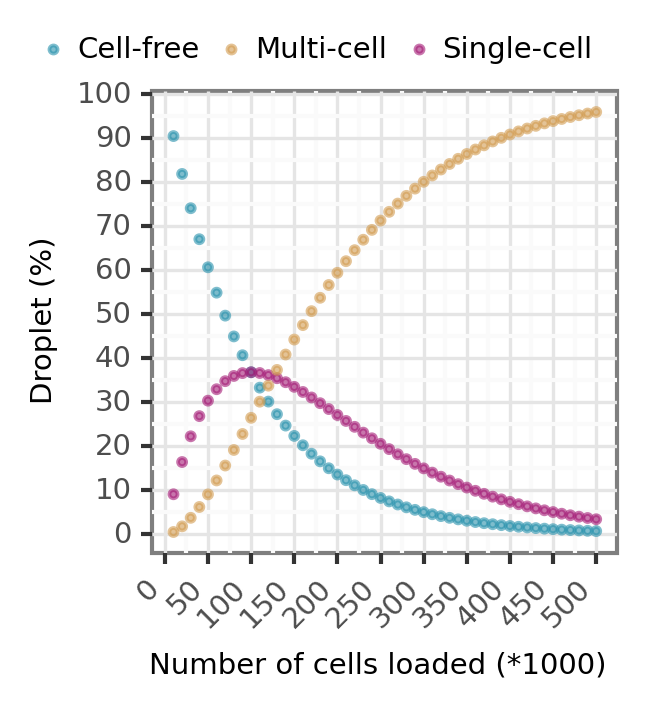

<ggplot: (2932098097098)>

In [29]:
plot=p9.ggplot(data=df_Drop_rate,
               mapping=p9.aes(x='num_CellLoad',y='percent_Drop',color='type')
              )
plot+ p9.geom_point(size=0.6,alpha=0.6) \
+ p9.themes.theme_bw() \
+ p9.scale_color_manual(values = {'Cell-free':'#2992AD','Single-cell':'#A41B76','Multi-cell':'#D29C51'}) \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.theme(axis_text_x=p9.element_text(rotation = 45,hjust=1)) \
+ p9.labels.xlab('Number of cells loaded (*1000)') \
+ p9.labels.ylab('Droplet (%)') \
+ p9.scales.scale_x_continuous(breaks=np.arange(0,520,50)) \
+ p9.scales.scale_y_continuous(breaks=np.arange(0,105,10)) \
+ p9.theme(text=p9.element_text(size=7),legend_position=(0.4,0.95),legend_title=p9.element_blank(),legend_direction='horizontal',legend_key=p9.element_blank(),legend_key_size=5,legend_box_margin=0) \
+ p9.theme(figure_size=(2,2)) 